## Phase 2 [EDL - Data analysis phase ]


1. Open new Jupyter notebook


2. Import required libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

3. Read your cleaned csv which you did in phase 1


In [11]:
df = pd.read_csv('Video_Game_Sales_Cleaned.csv')

4. Shape the data


In [12]:
print(f'Rows: {df.shape[0]}\nColumns: {df.shape[1]}')

Rows: 16448
Columns: 14


5. Show first five records


In [13]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,8.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.0,0.0,Unknown,NR
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,8.3,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,8.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.0,0.0,Unknown,NR


6. Show all columns of the dataframe

In [14]:
list(df.columns)

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales',
 'Critic_Score',
 'User_Score',
 'Developer',
 'Rating']

7. Show last 5 five rows


In [15]:
df.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Developer,Rating
16443,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,0.0,0.0,Unknown,NR
16444,LMA Manager 2007,X360,2006,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,0.0,0.0,Unknown,NR
16445,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,0.0,0.0,Unknown,NR
16446,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,0.0,0.0,Unknown,NR
16447,Winning Post 8 2016,PSV,2016,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,0.0,0.0,Unknown,NR


8. Describe the data.


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16448 entries, 0 to 16447
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16448 non-null  object 
 1   Platform         16448 non-null  object 
 2   Year_of_Release  16448 non-null  int64  
 3   Genre            16448 non-null  object 
 4   Publisher        16448 non-null  object 
 5   NA_Sales         16448 non-null  float64
 6   EU_Sales         16448 non-null  float64
 7   JP_Sales         16448 non-null  float64
 8   Other_Sales      16448 non-null  float64
 9   Global_Sales     16448 non-null  float64
 10  Critic_Score     16448 non-null  float64
 11  User_Score       16448 non-null  float64
 12  Developer        16448 non-null  object 
 13  Rating           16448 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 1.8+ MB


9. Group the sales data of each region on Year_of_Release and plot the same (It should
show which region sales was at peak on which year of release)


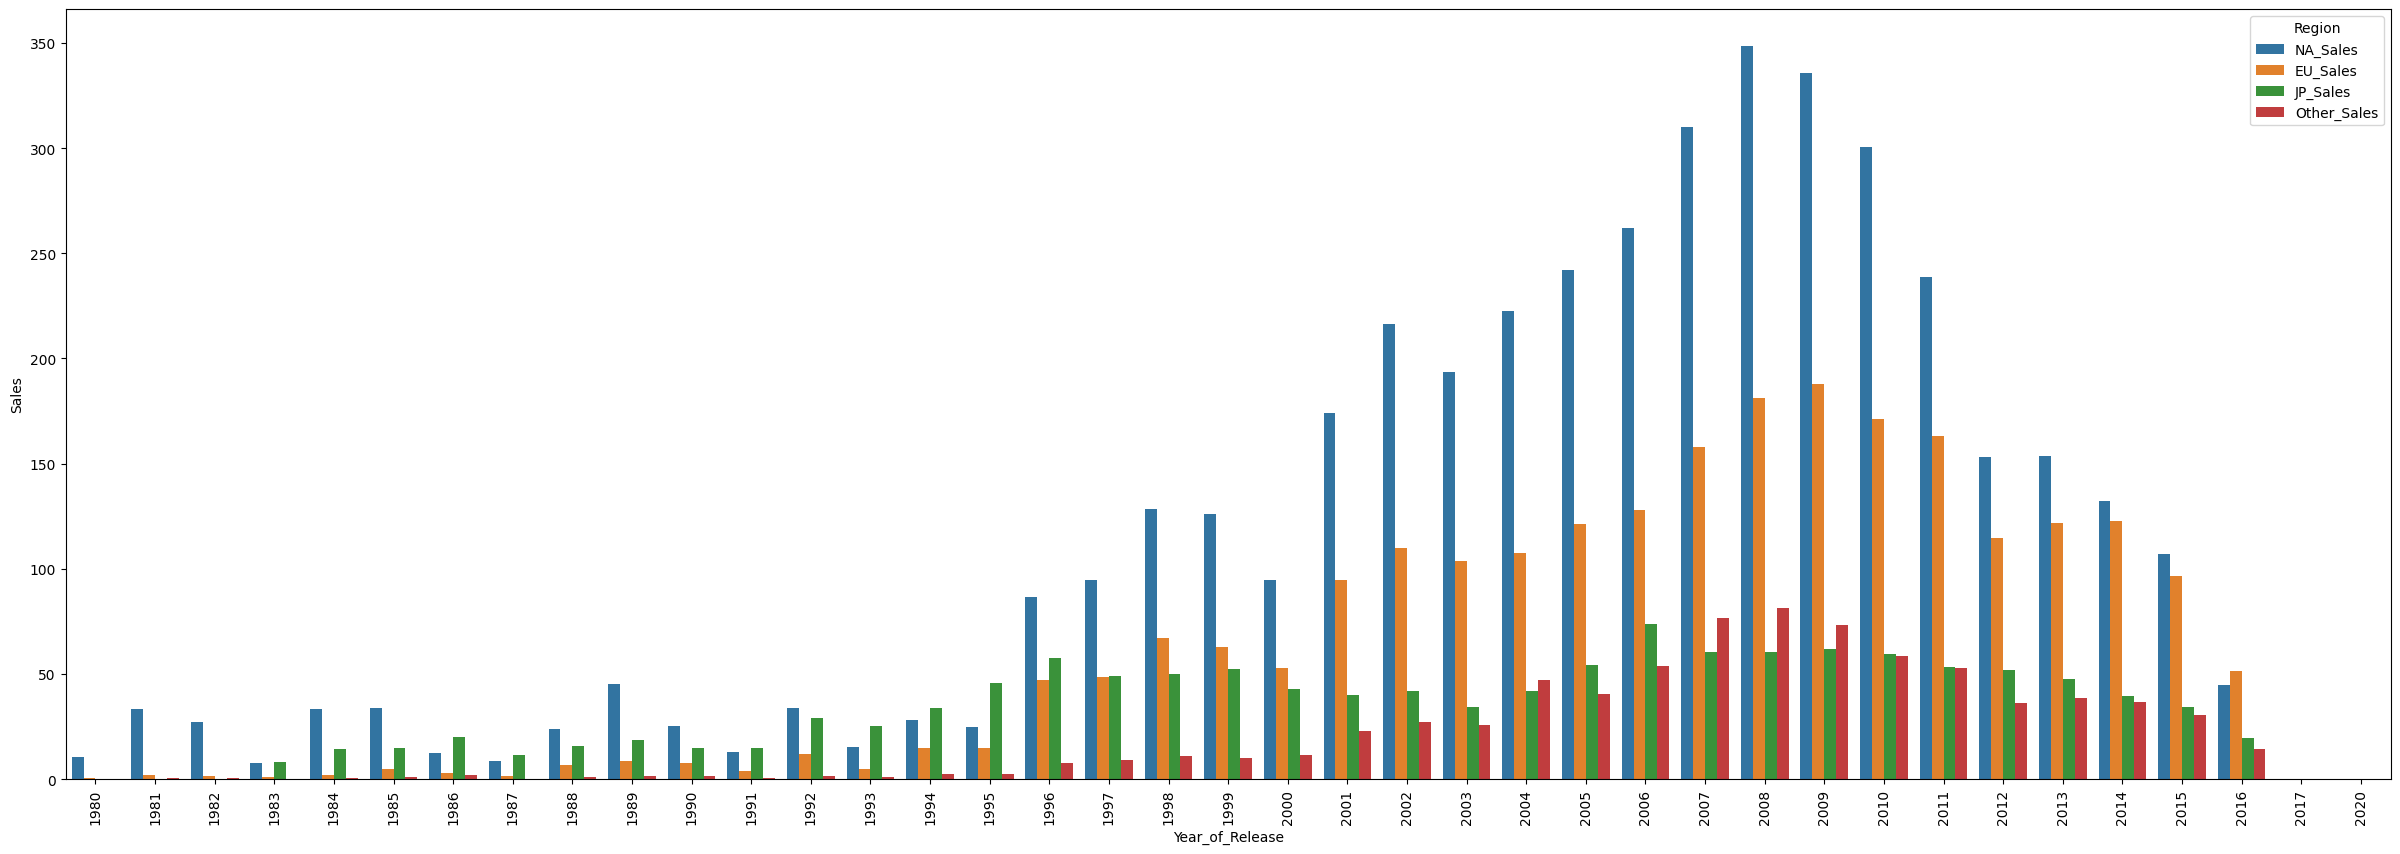

In [31]:
plot_data = df.groupby('Year_of_Release')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
plot_data = plot_data.reset_index()
dfm = plot_data.melt('Year_of_Release', var_name='Region', value_name='Sales')
plt.figure(figsize=(30,10))
sns.barplot(
    data=dfm,
    x='Year_of_Release',
    y='Sales',
    hue='Region'
    )
plt.xticks(rotation=90)
plt.show()

10. Group North American, Japan, European & Other region sales data as per Genre and
plot it (It should show highest of region according to game category , ex- NA_Sales is
highest in Adventure category , plot kind should be bar)


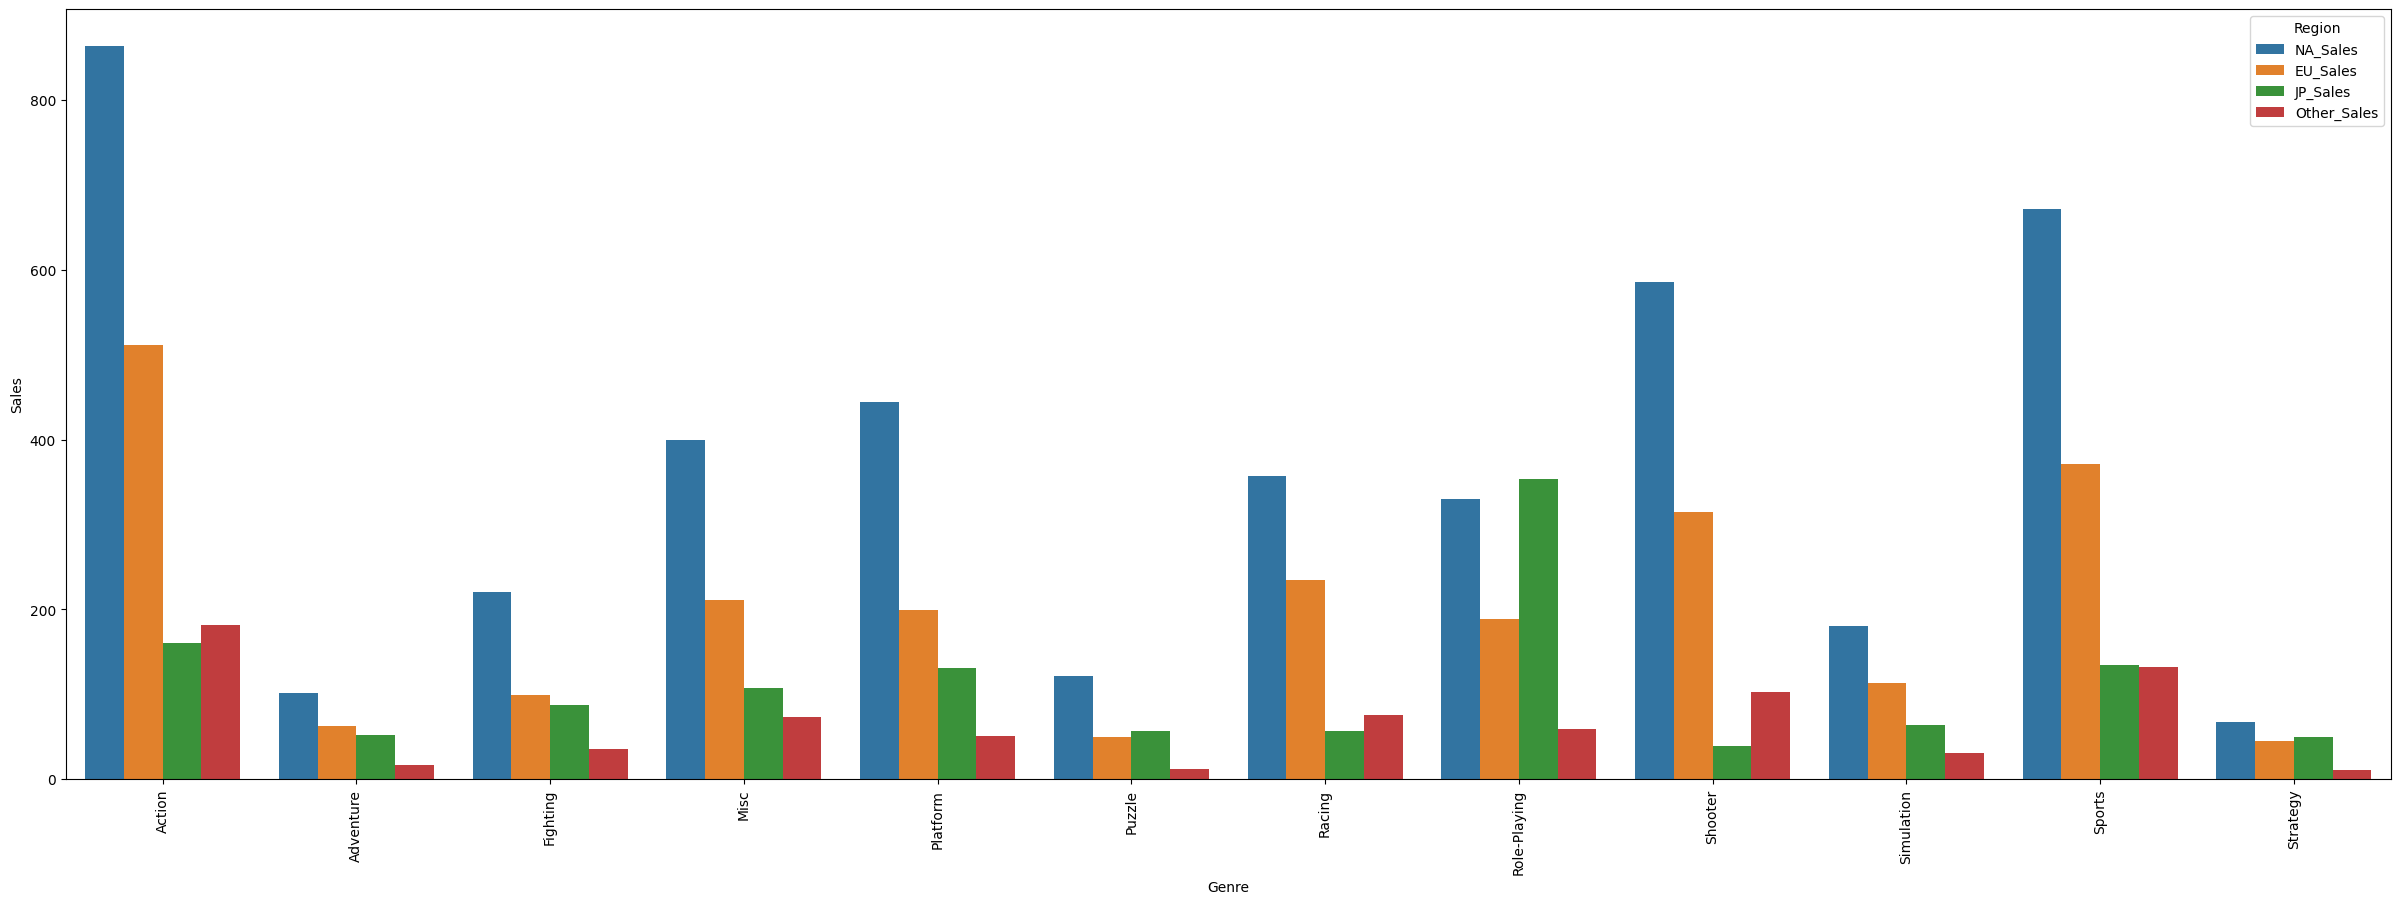

In [32]:
plot_data = df.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
plot_data = plot_data.reset_index()
dfm = plot_data.melt('Genre', var_name='Region', value_name='Sales')
plt.figure(figsize=(30,10))
sns.barplot(
    data=dfm,
    x='Genre',
    y='Sales',
    hue='Region'
    )
plt.xticks(rotation=90)
plt.show()

11. Group North American, Japan, European & Other region sales data as per Platform
and plot it (Should show sales as per "Platform genre" , plot kind should be bar )


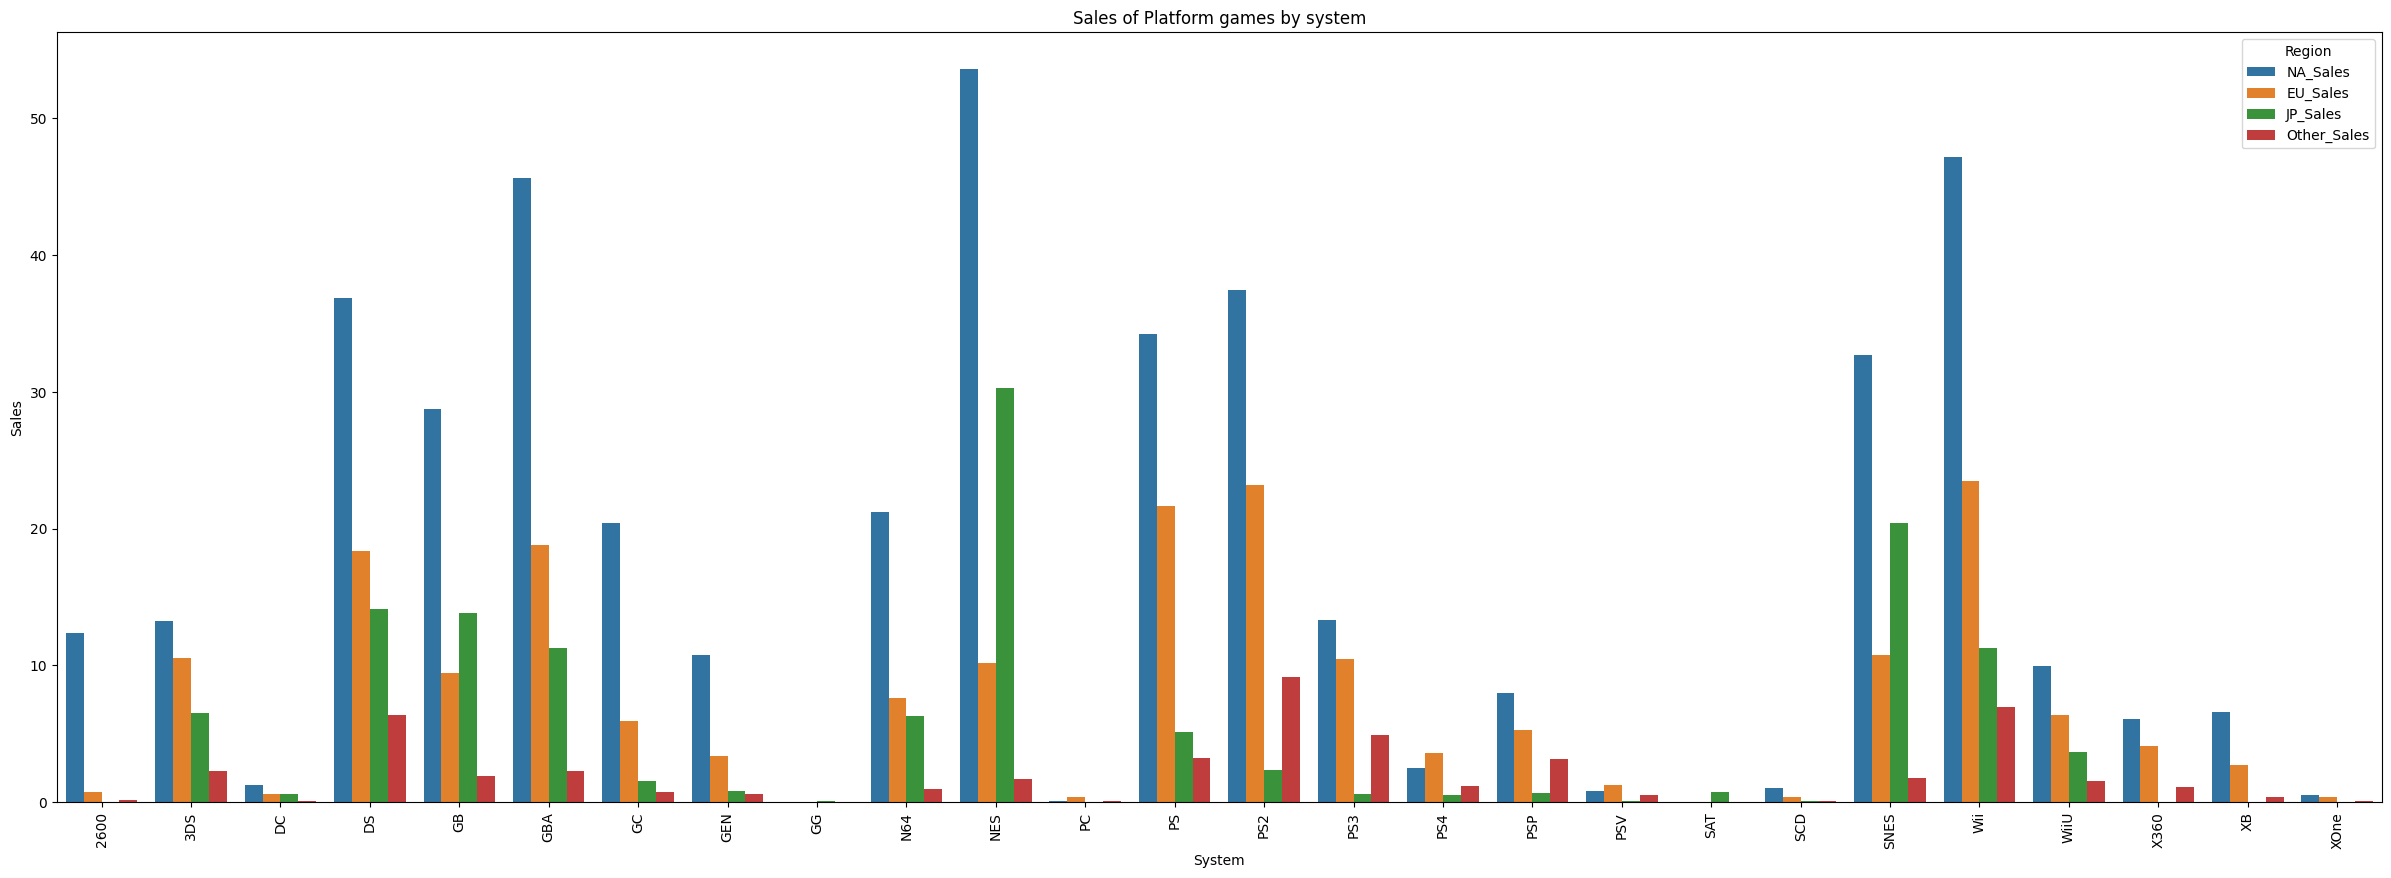

In [39]:
plot_data = df[df['Genre']=='Platform'].groupby('Platform')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
plot_data = plot_data.reset_index()
dfm = plot_data.melt('Platform', var_name='Region', value_name='Sales')
plt.figure(figsize=(30,10))
sns.barplot(
    data=dfm,
    x='Platform',
    y='Sales',
    hue='Region'
    )
plt.xticks(rotation=90)
plt.title('Sales of Platform games by system')
plt.xlabel('System')
plt.show()

12. Plot the Sales in all regions as per Platform , you need to create a boxplot for that
which will show the distribution of sales as per platform


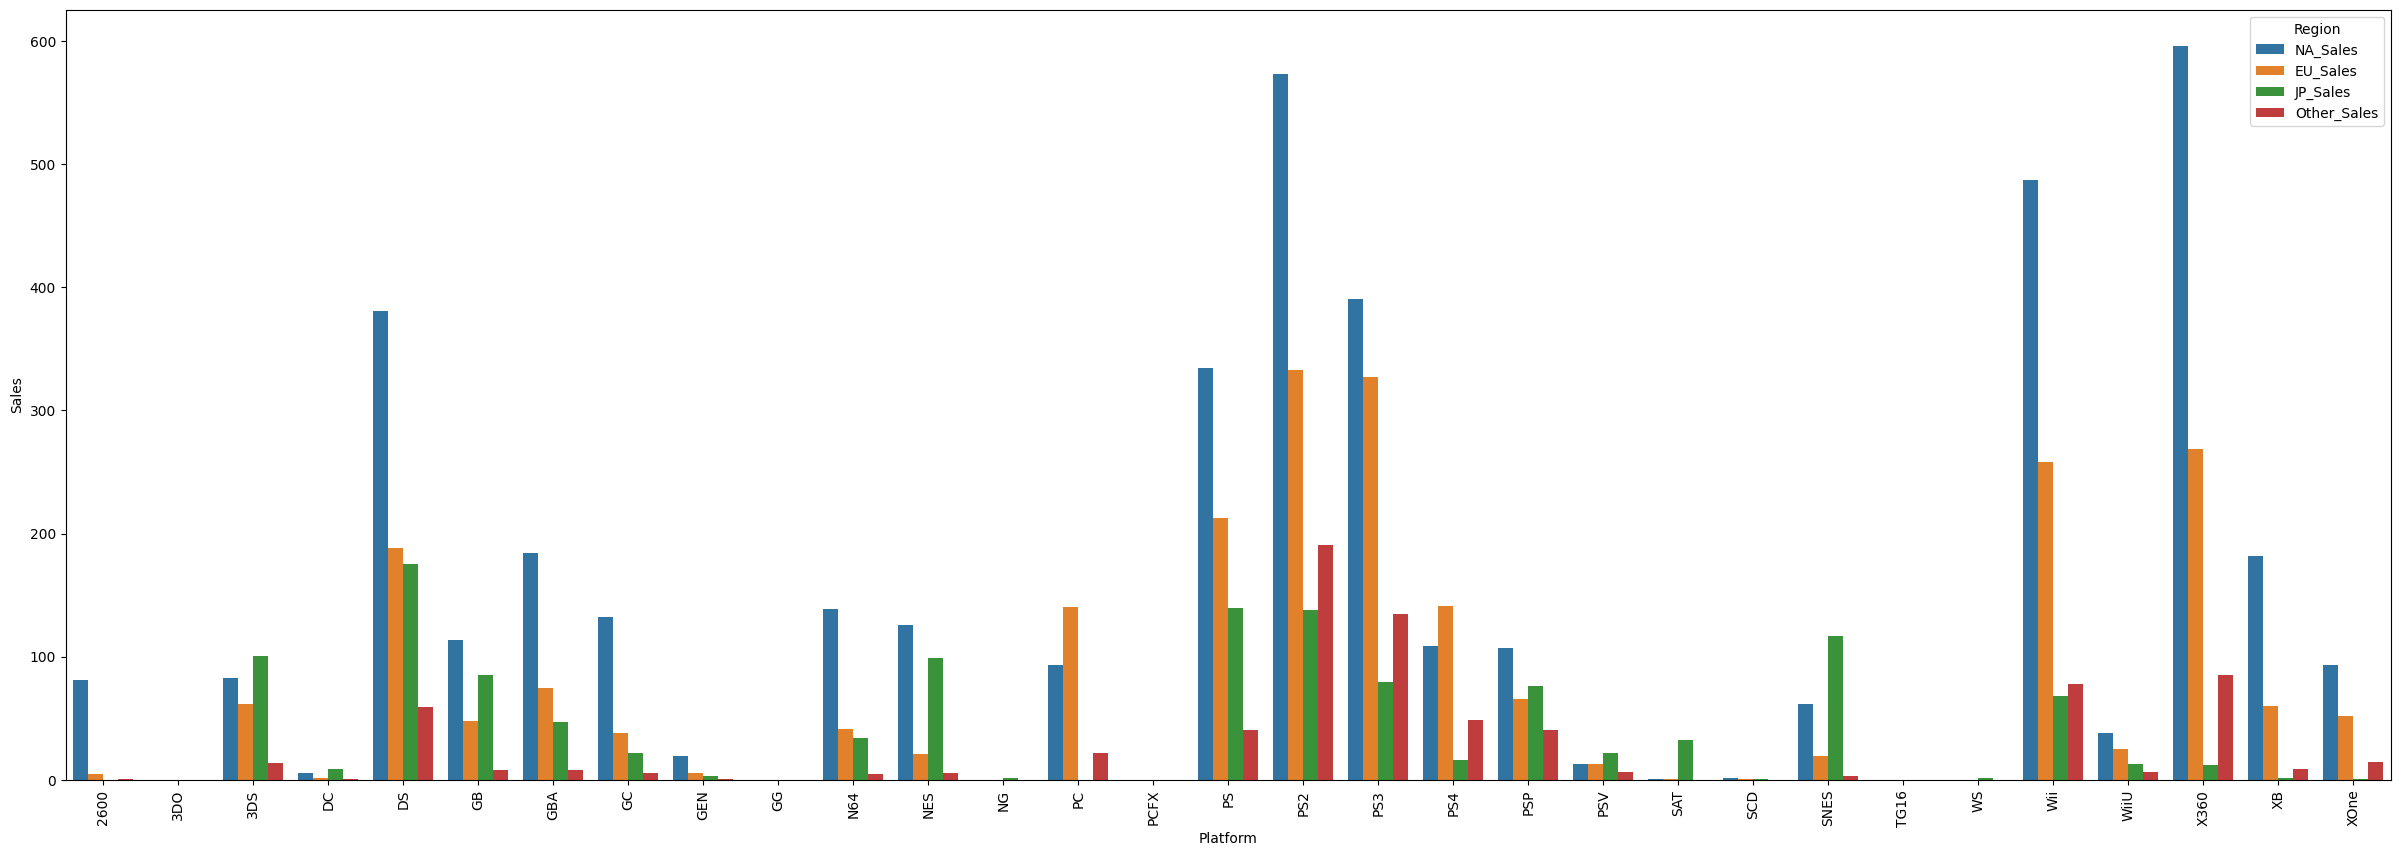

In [40]:
plot_data = df.groupby('Platform')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
plot_data = plot_data.reset_index()
dfm = plot_data.melt('Platform', var_name='Region', value_name='Sales')
plt.figure(figsize=(30,10))
sns.barplot(
    data=dfm,
    x='Platform',
    y='Sales',
    hue='Region'
    )
plt.xticks(rotation=90)
plt.show()

13. Find out which Genre games are sold in highest numbers (create a countplot of
seaborn which could do that)


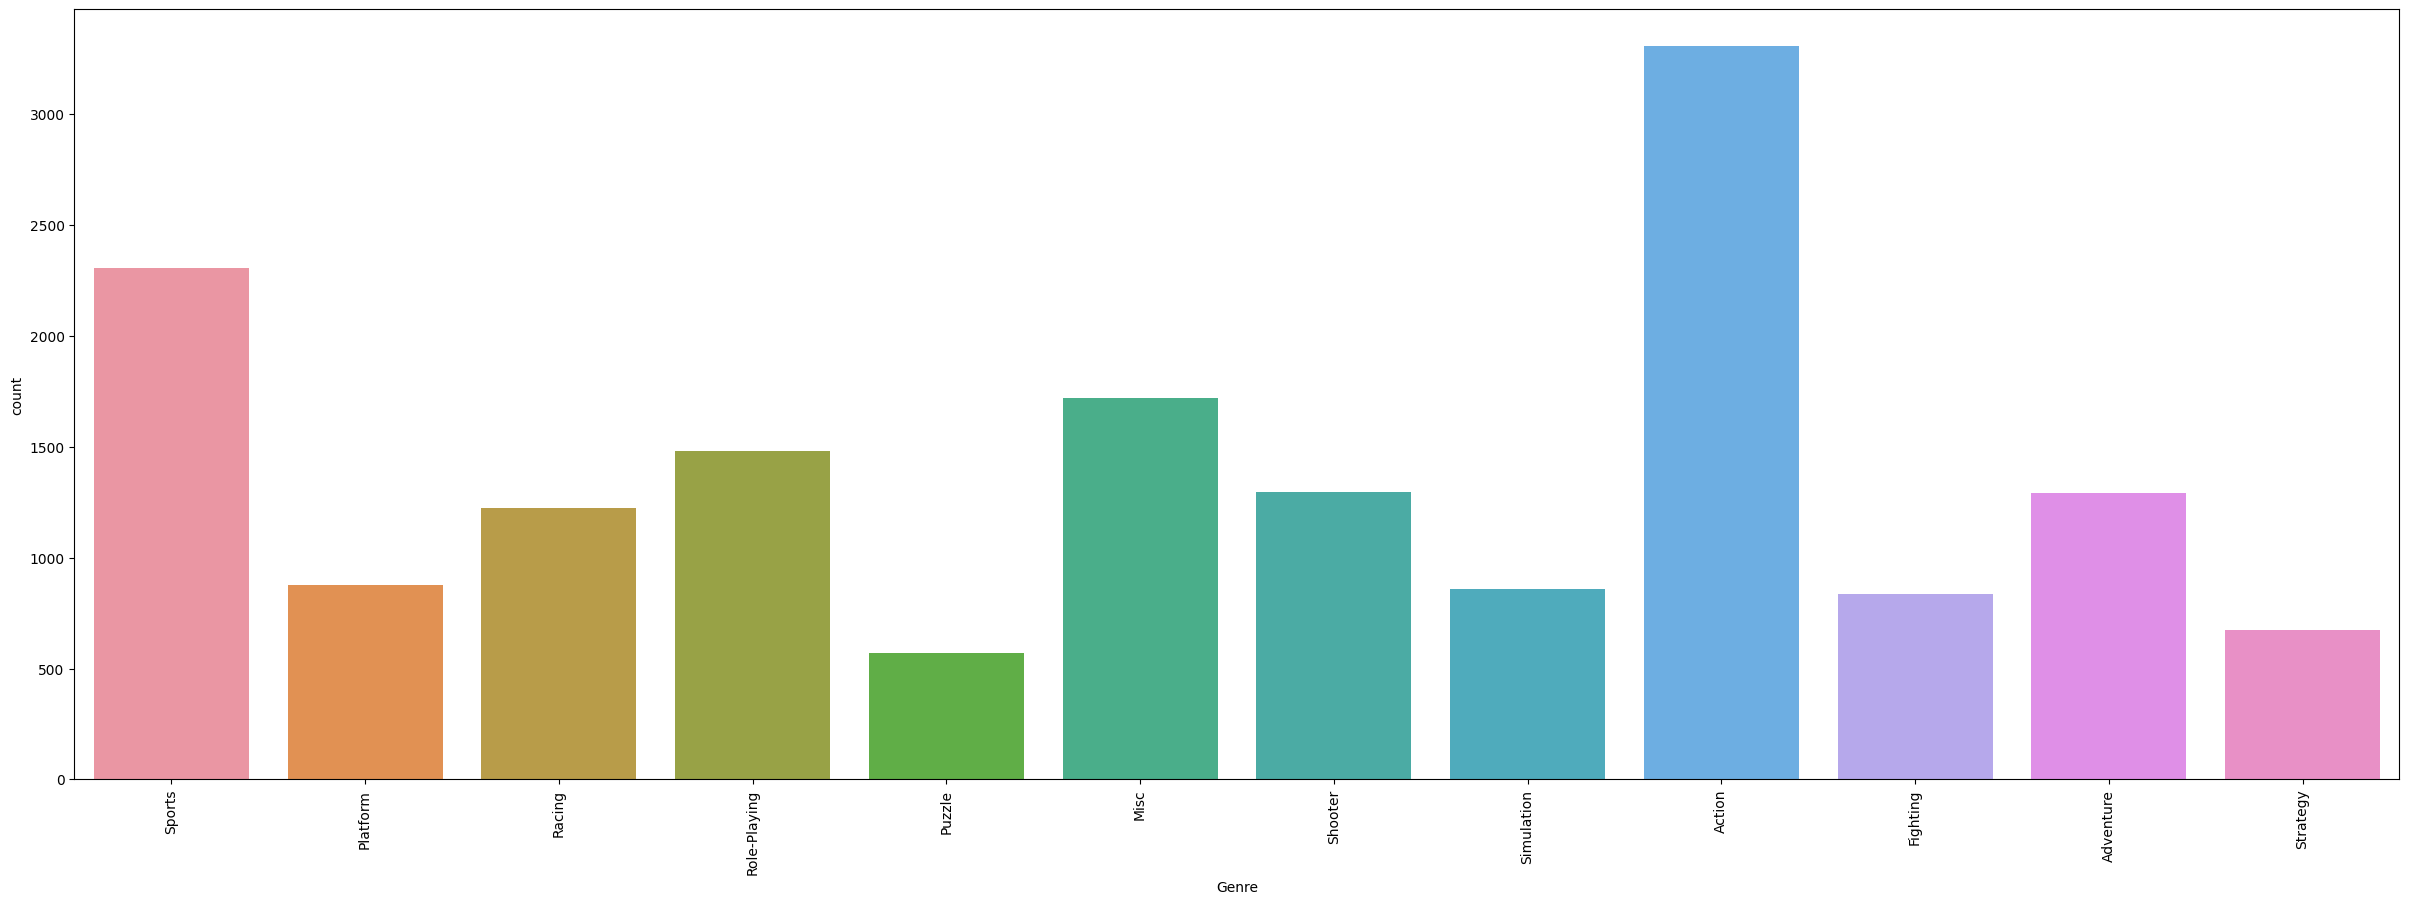

In [49]:
plt.figure(figsize=(30,10))
sns.countplot(
    data=df,
    x='Genre'
    )
plt.xticks(rotation=90)
plt.show()

14. Try to find out global sales as per Genre ,(create a barplot of seaborn for that)

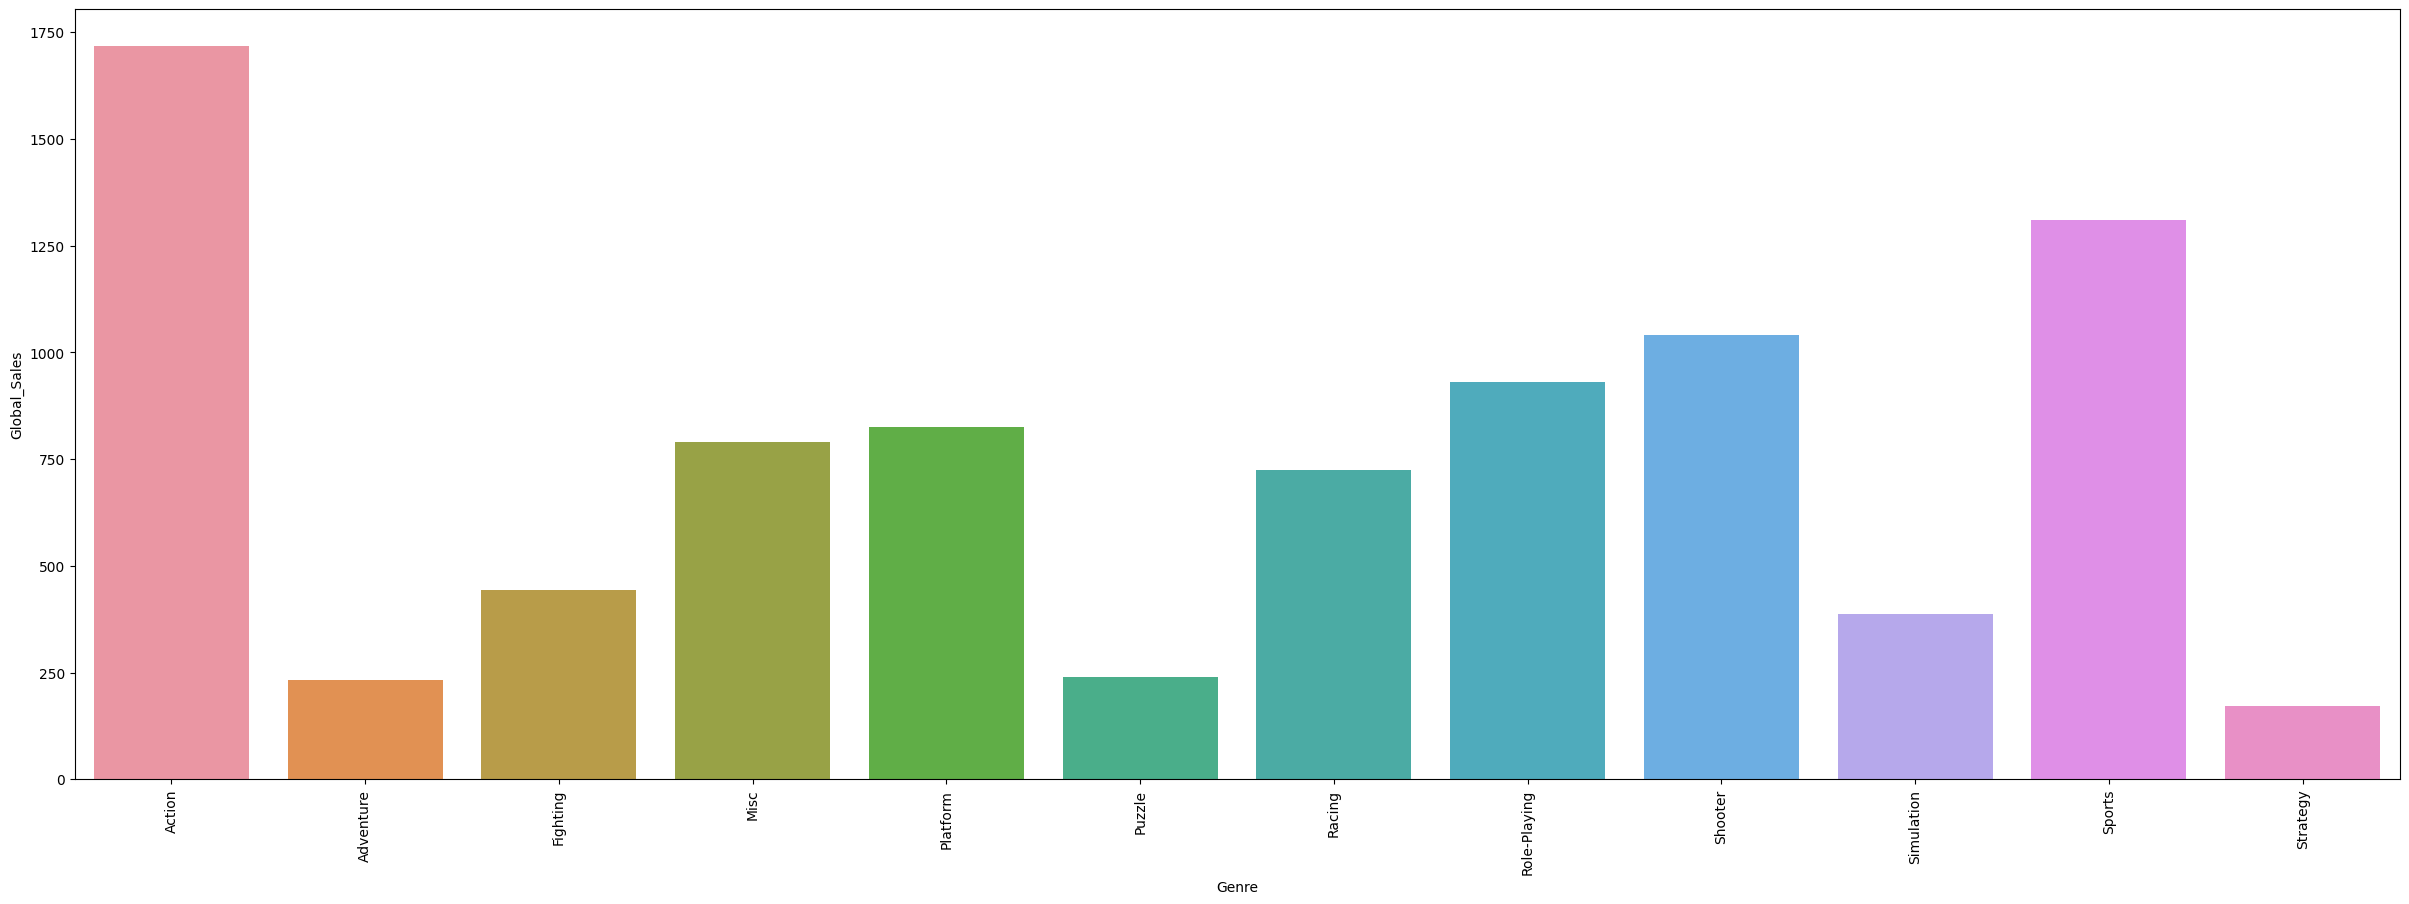

In [48]:
plot_data = df.groupby('Genre')['Global_Sales'].sum()
plt.figure(figsize=(30,10))
sns.barplot(
    data=plot_data.reset_index(),
    x='Genre',
    y='Global_Sales'
    )
plt.xticks(rotation=90)
plt.show()